In [1]:
import pandas as pd
import numpy as np
import sys
import os
from sklearn.model_selection import train_test_split
from tabpfn import TabPFNRegressor

# 将当前工作目录添加到 Python 路径
# 获取当前工作目录
current_working_dir = os.getcwd()

# 将根目录添加到 sys.path
sys.path.append(os.path.abspath(os.path.join(current_working_dir, '../..')))

In [2]:
# 读取数据
df = pd.read_csv('../dataset_all.csv')

columns_to_encode = ['CM_type', 'CM_morph', 'MS2_morph', 'CP_morph', 'Cation', 'Anion']
df_encoded = pd.get_dummies(df, columns=columns_to_encode)
df_encoded.shape

(782, 46)

In [3]:
# X = df_encoded.drop(['Cs'], axis=1)
# y = df_encoded['Cs']
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=21
# )

from function import split_data

X_train, X_test, y_train, y_test = split_data(df_encoded, 'Cs')

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


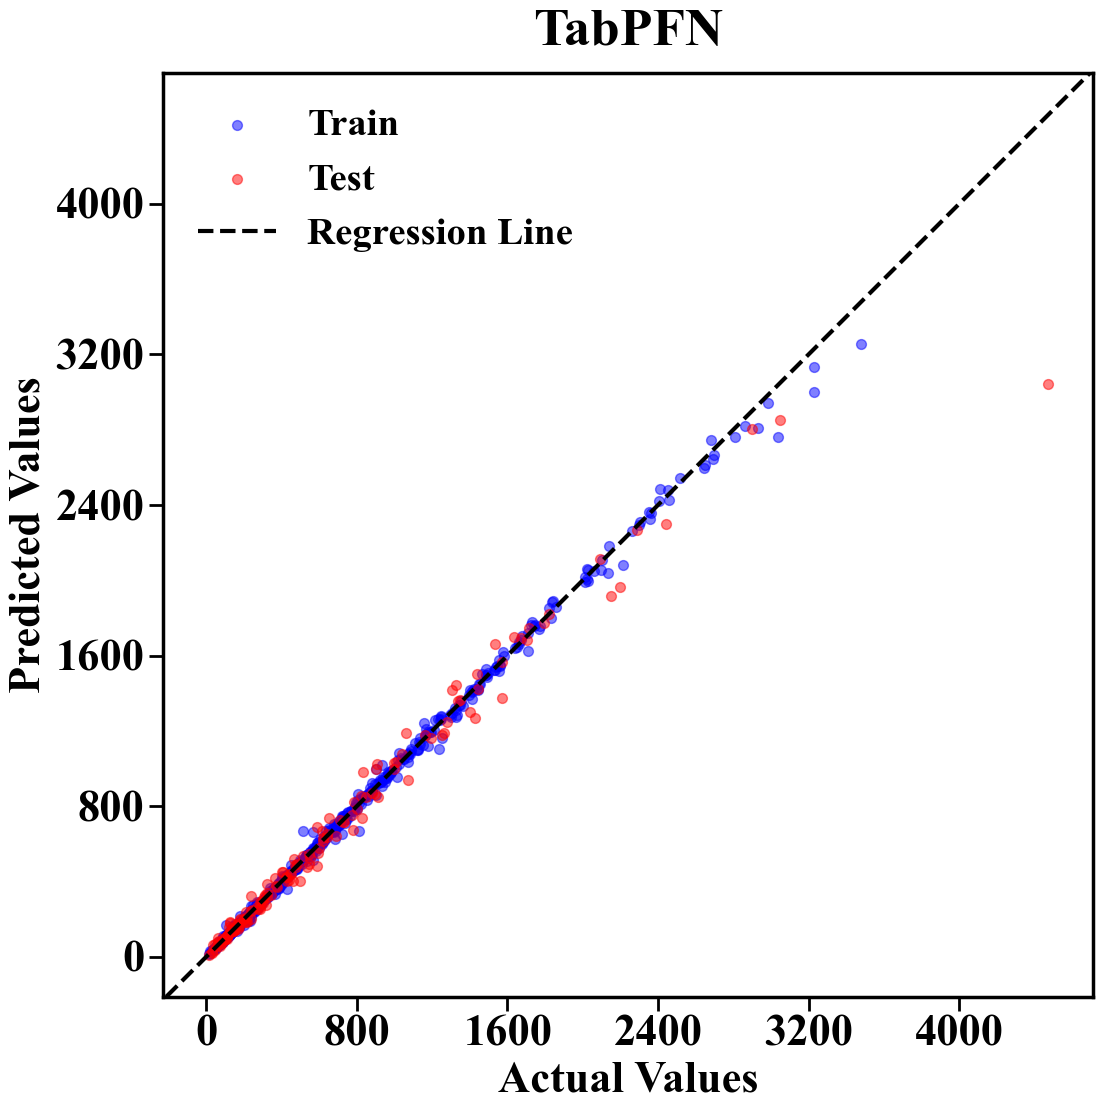

,model,R2_train,MAE_train,MAPE_train,RMSE_train,R2_test,MAE_test,MAPE_test,RMSE_test
0,TabPFN,1.0,13.65,2.84,28.41,0.96,44.92,8.52,128.2


In [4]:
# 初始化TabPFN回归模型
model = TabPFNRegressor()

# 训练模型
model.fit(X_train, y_train)

# 预测
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 评估
from function import metrics_to_dataframe, plot_actual_vs_predicted
plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, 'TabPFN', figpath='TabPFN_actual_vs_predicted.png')
tabpfn_metrics = metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, 'TabPFN').round(2)
tabpfn_metrics